# XSEDE Webinar: Python Tools for Data Science

<b>Chris Myers &nbsp;&nbsp; ( c.myers @ cornell.edu )<br />
    <br />
Center for Advanced Computing (CAC)&nbsp;&nbsp; & &nbsp;&nbsp;Department of Physics<br />
    <br />
Cornell University<br />
</b>

<hr />

See the Cornell Virtual Workshop (CVW) tutorials on "Python for Data Science", by Chris Myers and Jeff Sale, at: https://cvw.cac.cornell.edu/PyDataSci1 and https://cvw.cac.cornell.edu/PyDataSci2 .  

These slides are available as a Jupyter notebook in a github repository at https://github.com/CornellCAC/CVW_PyDataSci2 (in the file named PyDSWebinar.ipynb).

<table style="float:left"><tr>
    <td><img src="images/cornell_seal_simple_b31b1b.png" width="200"/></td>
    <td>                      </td>
    <td><img src="images/XSEDE_Logo_Blue.png" width="400"/></td>
    </tr></table>

## Code of Conduct

XSEDE has an external code of conduct which represents our commitment to providing an inclusive and harassment-free environment in all interactions regardless of race, age, ethnicity, national origin, language, gender, gender identity, sexual orientation, disability, physical appearance, political views, military service, health status, or religion. The code of conduct extends to all XSEDE-sponsored events, services, and interactions.

Code of Conduct: https://www.xsede.org/codeofconduct 

Contact:
* Event organizer: Susan Mehringer, CAC (shm7@cornell.edu) 
* XSEDE ombudspersons:
    * Linda Akli, Southeastern Universities Research Association (akli@sura.org)
    * Lizanne Destefano, Georgia Tech (lizanne.destefano@ceismc.gatech.edu)
    * Ken Hackworth, Pittsburgh Supercomputing Center (hackworth@psc.edu)
    * Bryan Snead, Texas Advanced Computing Center (jbsnead@tacc.utexas.edu)
* Anonymous reporting form available at https://www.xsede.org/codeofconduct

## Words Matter !

In line with XSEDE’s Code of Conduct, XSEDE is committed to providing training events that foster inclusion and show respect for all. This commitment applies not only to how we interact during the event; it also applies to the training materials and presentation. It is not XSEDE’s position to use, condone, or promote offensive terminology. XSEDE has posted a [Terminology Statement](http://xsede.org/terminology) at http://xsede.org/terminology .

XSEDE instructors strive to keep inclusive language at the forefront. In the event that we have included inappropriate materials, verbal or written, please let us know at terminology@xsede.org

While XSEDE has no control over external third-party documentation, we are taking steps to effect change by contacting the relevant organizations; we hope this will be addressed by all third parties soon. 

If you see any terminology concerns in the following presentation or slides, we want to know!  Please contact the Terminology Task Force: terminology@xsede.org

# XSEDE Webinar: Python Tools for Data Science

<b>Chris Myers &nbsp;&nbsp; ( c.myers @ cornell.edu )<br />
    <br />
Center for Advanced Computing (CAC)&nbsp;&nbsp; & &nbsp;&nbsp;Department of Physics<br />
    <br />
Cornell University<br />
</b>

<hr />

See the Cornell Virtual Workshop (CVW) tutorials on "Python for Data Science", by Chris Myers and Jeff Sale, at: https://cvw.cac.cornell.edu/PyDataSci1 and https://cvw.cac.cornell.edu/PyDataSci2 .  

These slides are available as a Jupyter notebook in a github repository at https://github.com/CornellCAC/CVW_PyDataSci2 (in the file named PyDSWebinar.ipynb).  The talk is being recorded and will be posted on the [CAC YouTube Channel](https://www.youtube.com/channel/UCVPGMVWhp3sqWZFU5NntjTA).

<table style="float:left"><tr>
    <td><img src="images/cornell_seal_simple_b31b1b.png" width="200"/></td>
    <td>                      </td>
    <td><img src="images/XSEDE_Logo_Blue.png" width="400"/></td>
    </tr></table>

# Introduction

* Data Science involves the amalgamation of tools and techniques from computational science, statistics, machine learning, and other fields, aimed at making sense of complex datasets and in building predictive models from those data
    * Data access and import
    * Data cleaning, processing, and filtering
    * Data visualization
    * Analysis, statistics, and modeling
    * Machine Learning
    * Construction of data processing pipelines to link these steps
* Due to both its expressive language and rich ecosystem of tools and packages, Python has emerged as a central player in the world of Data Science


# Python the Language & Python the Ecosystem 

* <b>Python the Language</b>: interpreted, dynamically typed, object-oriented, and extensible with compiled code
* <b>Python the Ecosystem</b>: packages, libraries and tools to support activities in a number of areas
    * System administration
    * Web programming
    * Computational science, data science & machine learning
* For numerically intensive tasks, many packages are partially written in compiled code (C/C++/Fortran) that is accessible from within Python
    * for more details, see "Python for High Performance" at https://cvw.cac.cornell.edu/Python

# The Python Data Science Ecosystem

* Most specific functionality for data science and scientific computing is provided by third-party libraries, which are typically a mix of Python code and compiled extension modules
    * <b>NumPy</b>: multi-dimensional arrays, linear algebra, random numbers
    * <b>SciPy</b>: routines for integration, optimization, root-finding, interpolation, etc.
    * <b>Pandas</b>: Series and Dataframes for tabular data and statistics (e.g., from spreadsheets)
    * <b>Scikit-learn, TensorFlow, Keras, PyTorch, Caffe</b>: machine learning
    * <b>Matplotlib, Seaborn, Bokeh</b>: plotting & graphics
    * <b>NetworkX</b>: networks
    * <b>Statsmodels</b>: statistical modeling
    * <b>SQLAlchemy</b>: interfacing to SQL databases
    * <b>Jupyter / IPython</b>: notebooks and interactive analyses
* Bundled distributions (e.g., Anaconda) and pip/PyPI provide support for managing packages and environments

<img src="images/PyDSEcosystem.png" width="1000"/>

# Datasets

* <b>Baseball Databank</b>: compilation of Major League Baseball data maintained by the Chadwick Baseball Bureau
    * consists of a set of interlinked CSV files for players, teams, etc.
* <b>Twitter Search</b>: a set of tweets involving #ClimateChange during Nov-Dec 2018
    * collected via the Twitter API
* <b>California Wildfires</b>: historical data on wildfire size and duration dating back to 1895
    * XLSX file originally provided on the Cal Fire website, derived from detailed GIS data on fire locations and extents

# Data come in many forms

* Array data
* Tabular data
* Heterogeneous data
* Relational data
* Network data
* "Big" data
* Image data
* Textual data
* Streaming data
* Hierarchical and aggregated data

<img src="images/ArraysAndDataframes.png"/>

# Reading data tables with Pandas

In [1]:
import pandas as pd
import numpy as np
import glob, os
pd.set_option('max_columns', 30)

def read_all_databank_core_csv(directory):
    """
    read all csv files in the specified baseball databank directory and
    populate a dictionary storing each of the tables keyed to its name
    """
    dfs = {}
    files = glob.glob('{}/*.csv'.format(directory))
    for f in files:
        d, name = os.path.split(f)
        table = os.path.splitext(name)[0]
        df = pd.read_csv(f)
        dfs[table] = df
    return dfs

## Read in all the baseball dataframes (bbdfs)

In [2]:
bbdfs = read_all_databank_core_csv('/Users/myers/repos/cvw_pydatasci1/data/baseballdatabank/core')

In [3]:
print(bbdfs.keys())

dict_keys(['AwardsManagers', 'Managers', 'AwardsPlayers', 'Fielding', 'Salaries', 'Parks', 'Schools', 'People', 'PitchingPost', 'Teams', 'Appearances', 'AwardsSharePlayers', 'TeamsFranchises', 'Batting', 'ManagersHalf', 'FieldingOF', 'Pitching', 'CollegePlaying', 'HomeGames', 'HallOfFame', 'AwardsShareManagers', 'BattingPost', 'TeamsHalf', 'SeriesPost', 'FieldingPost', 'AllstarFull', 'FieldingOFsplit'])


In [4]:
bbdfs['Batting'].head()   # note missing data - NaN

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [5]:
bbdfs['Teams'].head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,...,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,...,367,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,...,308,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,...,346,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,...,261,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,...,373,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


## Adding derived data: calculating singles (1B) from H,2B,3B,HR
   
Sometimes, our dataset doesn't contain all the information that we might want, but perhaps we can augment it with additional data. For example, the baseball batting dataset does not contain information about the number of singles (i.e., one-base hits in which the batter reached first base safely and remained there until the next batter batted), but that information can be derived from other data. 

Since the dataset contains information about the total number of hits H, as well as the number of 2B, 3B and HR, we can define an additional column in both the batting and teams dataframes to compute the number of singles (1B). Note the 1B data has been added as the last column.           


In [6]:
# let's extract a few dataframes for further processing
batting = bbdfs['Batting']
pitching = bbdfs['Pitching']
teams = bbdfs['Teams']

batting['1B'] = batting['H'] - batting['2B'] - batting['3B'] - batting['HR']
teams['1B'] = teams['H'] - teams['2B'] - teams['3B'] - teams['HR']
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,26
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,31
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,30
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,25


## Descriptive statistics

In [7]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,...,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,1B
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,NaN,NaN,N,NaN,401,...,2,42,23,243,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1,316
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,NaN,NaN,N,NaN,302,...,6,28,22,229,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1,240
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,NaN,NaN,N,NaN,249,...,13,53,34,234,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1,246
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,NaN,NaN,N,NaN,137,...,5,21,17,163,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1,149
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,NaN,NaN,N,NaN,302,...,7,42,22,235,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2,338


In [8]:
teams.describe()     # note the result is a new dataframe

,yearID,Rank,G,Ghome,W,L,R,AB,H,2B,3B,HR,BB,SO,SB,...,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,1B
count,2895.000000,2895.000000,2895.000000,2496.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2894.000000,2879.000000,2769.000000,...,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,2.616000e+03,2895.000000,2895.000000,2895.000000
mean,1956.963040,4.072539,150.692919,78.556891,74.942314,74.942314,683.611744,5154.547496,1347.913644,229.140933,46.506736,103.967530,475.229440,751.031956,111.022391,...,48.980656,9.685665,24.216235,4032.811744,1347.686356,103.967530,475.424870,750.522971,184.138860,133.539551,0.965802,1.380458e+06,100.194128,100.217271,968.298446
std,42.260337,2.308810,22.968790,4.638081,17.530459,17.274056,134.572259,741.546183,216.989317,58.673209,22.260486,62.781245,130.915516,308.694949,70.055574,...,39.056428,5.032649,16.351810,623.227983,216.955229,59.625974,130.396145,309.842690,108.208599,35.302549,0.029347,9.578068e+05,4.919002,4.846016,147.071761
min,1871.000000,1.000000,6.000000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,162.000000,49.000000,0.000000,1.000000,0.000000,47.000000,0.000000,0.761000,6.088000e+03,60.000000,60.000000,32.000000
25%,1921.000000,2.000000,154.000000,77.000000,66.000000,66.000000,615.000000,5142.000000,1303.000000,195.000000,30.000000,43.000000,427.000000,513.500000,64.000000,...,11.000000,6.000000,9.000000,4080.000000,1290.500000,49.000000,430.000000,506.500000,114.000000,117.000000,0.965000,5.447818e+05,97.000000,97.000000,929.000000
50%,1965.000000,4.000000,158.000000,81.000000,77.000000,76.000000,691.000000,5404.000000,1393.000000,233.000000,41.000000,109.000000,494.000000,755.000000,94.000000,...,43.000000,9.000000,25.000000,4251.000000,1392.000000,112.000000,496.000000,754.000000,143.000000,141.000000,0.977000,1.185781e+06,100.000000,100.000000,990.000000
75%,1994.000000,6.000000,162.000000,81.000000,87.000000,87.000000,764.000000,5520.500000,1466.000000,272.000000,59.000000,153.000000,554.000000,980.500000,139.000000,...,77.000000,13.000000,38.000000,4342.000000,1470.000000,152.000000,554.000000,985.500000,212.000000,157.000000,0.981000,2.065338e+06,103.000000,103.000000,1046.000000
max,2018.000000,13.000000,165.000000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,150.000000,267.000000,835.000000,1594.000000,581.000000,...,148.000000,32.000000,68.000000,4518.000000,1993.000000,258.000000,827.000000,1687.000000,639.000000,217.000000,0.991000,4.483350e+06,129.000000,141.000000,1345.000000


## Groupby operations

An extremely powerful set of capabilities is provided by the <code>groupby</code> method on dataframes, which provides support for <i>split-apply-combine</i> operations.  This means, for example, that we can:
<ul>
    <li><i>split</i> a dataframe into groups based on identity of a specified key or some other criterion
            <li><i>apply</i> an aggregating function across each of the subgroups, and then <li> <i>combine</i> the aggregated information back in a single dataframe  
    </ul>

Each row in the <code>batting</code> dataframe contains information about a single player in a single year.  What if we wanted to know the totals of all of those statistics, on a year-by-year basis.  We can create a new dataframe by grouping by the <code>'yearID'</code> and then summing each of those year-by-year groups.

In [9]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,26
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,31
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,30
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,25


In [10]:
batting_by_year = batting.groupby('yearID').sum()   #.reset_index()
batting_by_year.head()

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
yearID,,,,,,,,,,,,,,,,,,,
1871,115,2296,10822,2659,3101,434,239,47,1783.0,441.0,123.0,393,175.0,0.0,0.0,0.0,0.0,74.0,2381
1872,172,3305,15663,3390,4467,581,145,37,2132.0,269.0,134.0,263,264.0,0.0,0.0,0.0,0.0,97.0,3704
1873,128,3604,16959,3580,4926,570,211,47,2331.0,314.0,131.0,335,278.0,0.0,0.0,0.0,0.0,122.0,4098
1874,126,4199,19104,3470,5224,634,194,40,2252.0,242.0,97.0,238,357.0,0.0,0.0,0.0,0.0,107.0,4356
1875,248,6248,26833,4234,6812,839,273,40,2710.0,629.0,320.0,249,675.0,0.0,0.0,0.0,0.0,142.0,5660


If we group and sum instead by the <code>'playerID'</code> column, we get each player's career batting statistics.

In [11]:
pl_bat = batting.groupby('playerID').sum().reset_index()    # could apply other aggregating functions
pl_bat.head(10)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
0,aardsda01,18084,9,331,4,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0
1,aaronha01,45195,23,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,2294
2,aaronto01,13768,7,437,944,102,216,42,6,13,94.0,9.0,8.0,86,145.0,3.0,0.0,9.0,6.0,36.0,155
3,aasedo01,25786,13,448,5,0,0,0,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0
4,abadan01,6010,3,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,2
5,abadfe01,18124,10,363,9,0,1,0,0,0,0.0,0.0,0.0,0,5.0,0.0,0.0,0.0,0.0,1.0,1
6,abadijo01,3750,3,12,49,4,11,0,0,0,5.0,1.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,11
7,abbated01,19051,11,855,3044,355,772,99,43,11,324.0,142.0,0.0,289,283.0,0.0,33.0,93.0,0.0,0.0,619
8,abbeybe01,11365,7,79,225,21,38,3,3,0,17.0,3.0,0.0,21,54.0,0.0,0.0,6.0,0.0,0.0,32
9,abbeych01,9475,5,452,1756,307,493,67,46,19,280.0,93.0,0.0,167,122.0,0.0,23.0,19.0,0.0,0.0,361


## SQL databases: the interoperation of SQLAlchemy and Pandas

<b>Relational database</b>: a set of data tables connected through shared data

Note: running the code cell below will generate a file in the code directory named 'bbdb.sqlite', which will be approximately 34 MB in size.

In [12]:
from sqlalchemy import create_engine

def write_all_tables_to_sqlite(dfs, sql_filename):
    engine = create_engine('sqlite:///{}'.format(sql_filename))
    for table, df in dfs.items():
        df.to_sql(table, con=engine, index=False)
    engine.dispose()
    
sqlite_filename = 'bbdb.sqlite'
try:
    os.remove(sqlite_filename)
except FileNotFoundError:
    pass

write_all_tables_to_sqlite(bbdfs, sqlite_filename)

## Making a SQL query to Baseball DB

With all the data in a SQLite database, we can connect to it and issue SQL queries to extract data of interest, such as which players had the most hits in a season.

In [13]:
engine = create_engine('sqlite:///bbdb.sqlite')
most_hits_in_a_year = \
    pd.read_sql_query('select * from batting order by H desc limit 10', engine)
most_hits_in_a_year

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
0,suzukic01,2004,1,SEA,AL,161,704,101,262,24,5,8,60.0,36.0,11.0,49,63.0,19.0,4.0,2.0,3.0,6.0,225
1,sislege01,1920,1,SLA,AL,154,631,137,257,49,18,19,122.0,42.0,17.0,46,19.0,NaN,2.0,13.0,NaN,NaN,171
2,odoulle01,1929,1,PHI,NL,154,638,152,254,35,6,32,122.0,2.0,NaN,76,19.0,NaN,4.0,13.0,NaN,NaN,181
3,terrybi01,1930,1,NY1,NL,154,633,139,254,39,15,23,129.0,8.0,NaN,57,33.0,NaN,1.0,19.0,NaN,NaN,177
4,simmoal01,1925,1,PHA,AL,153,654,122,253,43,12,24,129.0,7.0,14.0,35,41.0,NaN,1.0,6.0,NaN,NaN,174
5,hornsro01,1922,1,SLN,NL,154,623,141,250,46,14,42,152.0,17.0,12.0,65,50.0,NaN,1.0,15.0,NaN,NaN,148
6,kleinch01,1930,1,PHI,NL,156,648,158,250,59,8,40,170.0,4.0,NaN,54,50.0,NaN,4.0,13.0,NaN,NaN,143
7,cobbty01,1911,1,DET,AL,146,591,147,248,47,24,8,127.0,83.0,NaN,44,NaN,NaN,8.0,11.0,NaN,NaN,169
8,sislege01,1922,1,SLA,AL,142,586,134,246,42,18,8,105.0,51.0,19.0,49,14.0,NaN,3.0,16.0,NaN,NaN,178
9,suzukic01,2001,1,SEA,AL,157,692,127,242,34,8,8,69.0,56.0,14.0,30,53.0,10.0,8.0,4.0,4.0,3.0,192


In [14]:
pd.read_sql_query("""select people.nameFirst, people.nameLast, batting.playerID, batting.yearID, batting.H
from people join batting on people.playerID=batting.playerID order by batting.H desc limit 10""", engine) 

,nameFirst,nameLast,playerID,yearID,H
0,Ichiro,Suzuki,suzukic01,2004,262
1,George,Sisler,sislege01,1920,257
2,Lefty,O'Doul,odoulle01,1929,254
3,Bill,Terry,terrybi01,1930,254
4,Al,Simmons,simmoal01,1925,253
5,Rogers,Hornsby,hornsro01,1922,250
6,Chuck,Klein,kleinch01,1930,250
7,Ty,Cobb,cobbty01,1911,248
8,George,Sisler,sislege01,1922,246
9,Ichiro,Suzuki,suzukic01,2001,242


## Any quick questions about Pandas and DataFrames?

# Data Visualization

* Matplotlib & friends
    * matplotlib: low-level, comprehensive plotting API
    * pandas: uses matplotlib for plotting from DataFrames and Series
    * seaborn: uses matplotlib for plotting, with emphasis on statistical distributions
    * statsmodels: uses matplotlib for plotting statistical models alongside data
* Bokeh: interactive, web-based visualization (Python interfacing to Javascript)

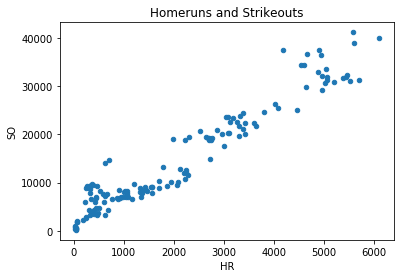

In [15]:
import matplotlib.pyplot as plt

batting_by_year.plot.scatter('HR', 'SO');
plt.title('Homeruns and Strikeouts')
plt.savefig('batting_HR_SO_scatter.png');


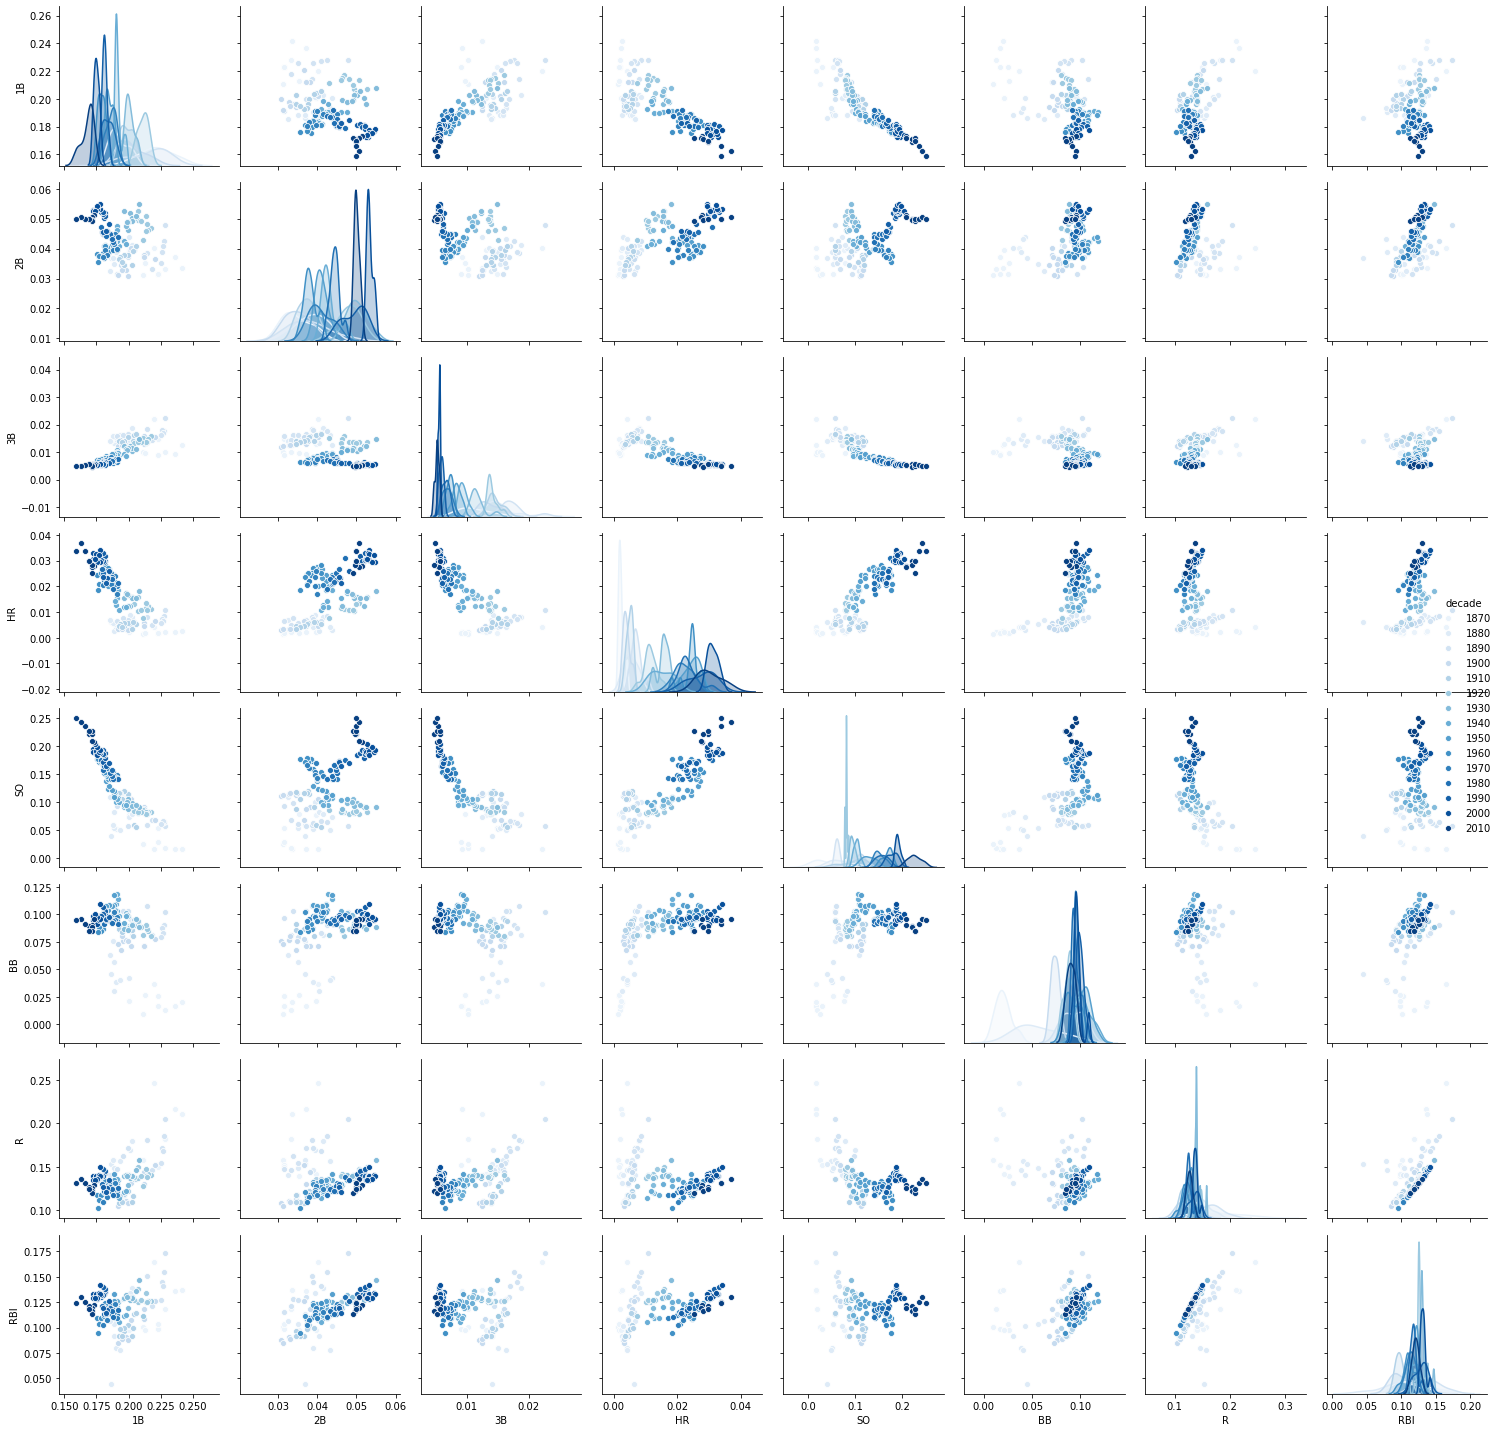

In [16]:
import seaborn as sns

batting_by_year = batting.groupby('yearID').sum().reset_index()

batting_per_AB_by_year = batting_by_year.copy()
for col in batting_per_AB_by_year.columns:
    if col in ['yearID', 'stint', 'G', 'AB']:
        continue
    batting_per_AB_by_year[col] = batting_per_AB_by_year[col]/batting_per_AB_by_year['AB']

batting_per_AB_by_year['decade'] = np.floor_divide(batting_per_AB_by_year['yearID'],10)*10

hit_vars = ('1B', '2B', '3B', 'HR', 'SO', 'BB', 'R', 'RBI')

pg = sns.pairplot(batting_per_AB_by_year, vars=hit_vars, hue='decade', palette='Blues')
plt.tight_layout()

## Statistics with statsmodels

* Provides support for the estimation of many different statistical models, conducting statistical tests, and statistical data exploration
* Provides functionality similar to that offered by other widely used statistical modeling environments, such as R, SAS, and Minitab  
* Linear regression models, generalized linear models, time series analysis, and state space models
* Consider here Ordinary Least Squares (OLS) analysis of Homerun and Strikeout data


In [17]:
import statsmodels.api as sm
X = batting_by_year['HR']
y = batting_by_year['SO']
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     SO   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1744.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           4.49e-83
Time:                        10:03:30   Log-Likelihood:                -1392.9
No. Observations:                 148   AIC:                             2790.
Df Residuals:                     146   BIC:                             2796.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2318.1553    379.549      6.108      0.0

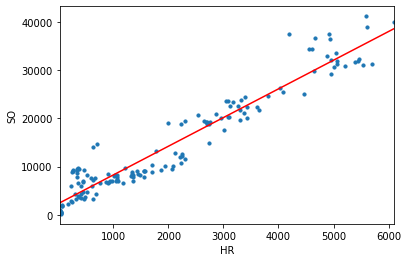

In [18]:
# Statsmodels provides a plotting API that also uses matplotlib
fig = sm.graphics.abline_plot(model_results=results, c='r')
ax = fig.axes[0]
ax.scatter(X['HR'], y, s=10)
plt.xlabel('HR');
plt.ylabel('SO');


## Modeling data

#### Sabermetrics and the "Pythagorean" theorem of baseball

<a href="https://en.wikipedia.org/wiki/Pythagorean_expectation">"Pythonagorean winning percentage" (Bill James)</a>: What fraction of games (G) should we expect a team to win (W) based upon the number of runs it scores (R) and the number it allows (RA)?

$W/G = \frac{R^2}{R^2 + RA^2} = \frac{1}{1 + (RA/R)^2}$

James originally formulated this with exponent 2.  Later analyses estimated different exponents based on the data.

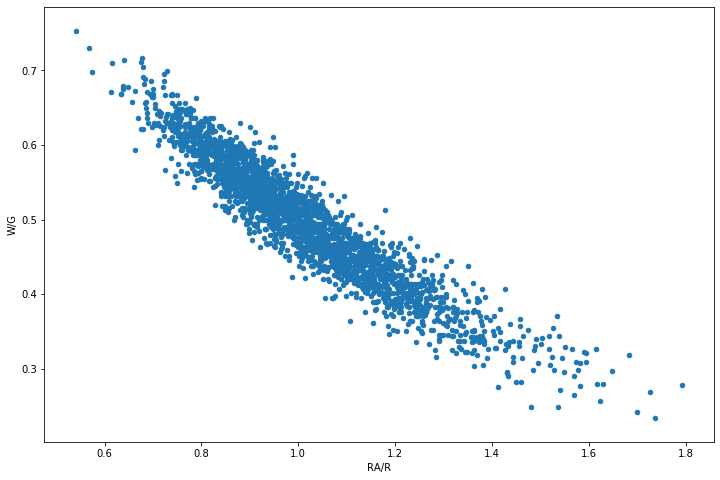

In [19]:
teams00 = teams[teams.yearID >= 1900].copy()
teams00['W/G'] = teams00.W/teams00.G
teams00['RA/R'] = teams00.RA / teams00.R
teams00.plot.scatter('RA/R', 'W/G', figsize=(12,8))
plt.xlabel('RA/R');
plt.ylabel('W/G');

# Parameter estimation using scipy

$W/G = \frac{R^2}{R^2 + RA^2} = \frac{1}{1 + (RA/R)^2}$


In [20]:
from scipy.optimize import curve_fit

def pythag(x, exponent):
    return 1 / (1 + x**exponent)

xdata = teams00.RA/teams00.R
ydata = teams00['W/G']

popt, pcov = curve_fit(pythag, xdata, ydata, [2.0])
print(popt)

[1.83891722]


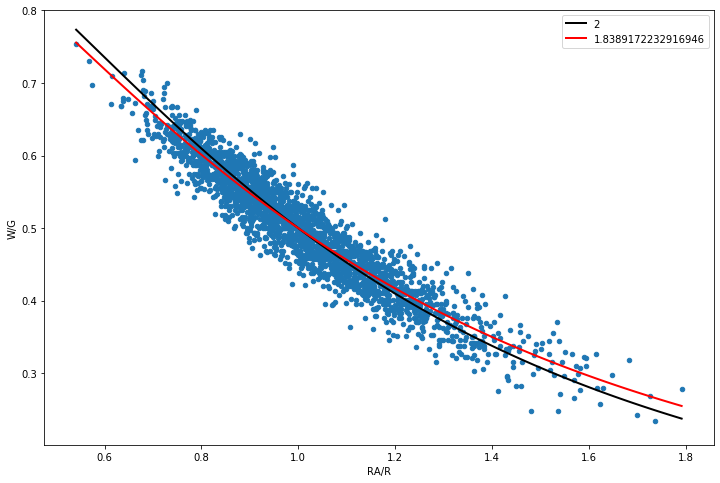

In [21]:
xs = np.linspace(teams00['RA/R'].min(), teams00['RA/R'].max(), 100)
expected_wins_2 = pythag(xs, exponent=2)
expected_wins_popt = pythag(xs, exponent=popt[0])

teams00.plot.scatter('RA/R', 'W/G', figsize=(12,8))
plt.plot(xs, expected_wins_2, color='k', linewidth=2, label='2')
plt.plot(xs, expected_wins_popt, color='r', linewidth=2, label=str(popt[0]))
plt.legend();
plt.savefig('pythagorean_curve_fit.png');

## Any quick questions about Data Visualization, Modeling and Parameter Estimation?

# Networks from Data

* network (or graph): data structure with nodes (or vertices) connected by edges (or links)
    * edges can be undirected, directed, weighted, etc.
* NetworkX: Python package for construction and analysis of complex networks
* Some common network analyses
    * computing shortest paths between pairs of nodes
    * identifying the set of connected components within a network
    * computing various centrality measures characterizing nodes and edges (e.g., degree, closeness, betweenness, etc.)
    * identifying modules or communities within networks based upon patterns of connectivity
    * creating random graphs consistent with prescribed statistical properties


# Co-Player Network in Baseball

## Something like the co-actor network used to play the Kevin Bacon game

![](images/coactor.png)

In [22]:
appearances = bbdfs['Appearances']
appearances.tail()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
105784,2018,CLE,AL,zimmebr01,34,29.0,34,34.0,0,0,0,0,0,0,0,34,0,34,0.0,2.0,0.0
105785,2018,DET,AL,zimmejo02,25,25.0,2,25.0,25,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
105786,2018,WAS,NL,zimmery01,85,72.0,85,73.0,0,0,73,0,0,0,0,0,0,0,0.0,13.0,0.0
105787,2018,CHN,NL,zobribe01,139,108.0,139,125.0,0,0,4,63,0,0,43,0,61,84,1.0,22.0,0.0
105788,2018,SEA,AL,zuninmi01,113,102.0,113,111.0,0,111,0,0,0,0,0,0,0,0,1.0,7.0,0.0


In [23]:
import networkx as nx

def make_coplayer_network(appearances):
    dfyt = appearances.groupby(['yearID', 'teamID'])['playerID'].\
        apply(np.unique).reset_index()
    g = nx.Graph()
    for idx, entry in dfyt.iterrows():
        yearID, teamID, playerIDs = entry
        for pid in playerIDs:
            g.add_edge((yearID, teamID), pid)
    return g

coplayer = make_coplayer_network(bbdfs['Appearances'])
list(coplayer.neighbors('zobribe01'))

[(2006, 'TBA'),
 (2007, 'TBA'),
 (2008, 'TBA'),
 (2009, 'TBA'),
 (2010, 'TBA'),
 (2011, 'TBA'),
 (2012, 'TBA'),
 (2013, 'TBA'),
 (2014, 'TBA'),
 (2015, 'KCA'),
 (2015, 'OAK'),
 (2016, 'CHN'),
 (2017, 'CHN'),
 (2018, 'CHN')]

In [24]:
list(coplayer.neighbors((2016, 'CHN')))

['almoral01',
 'arrieja01',
 'baezja01',
 'bryankr01',
 'buchaja01',
 'cahiltr01',
 'candeje01',
 'chapmar01',
 'coghlch01',
 'concege01',
 'contrwi01',
 'edwarca01',
 'federti01',
 'fowlede01',
 'grimmju01',
 'hammeja01',
 'hendrky01',
 'heywaja01',
 'kalisry01',
 'kawasmu01',
 'lackejo01',
 'lasteto01',
 'lestejo01',
 'matusbr01',
 'montemi01',
 'montgmi01',
 'nathajo01',
 'pattosp01',
 'penafe01',
 'peraljo01',
 'ramirne01',
 'richacl01',
 'rizzoan01',
 'rondohe01',
 'rossda01',
 'russead02',
 'schwaky01',
 'smithjo05',
 'solerjo01',
 'stroppe01',
 'szczuma01',
 'warread01',
 'woodtr01',
 'zastrro01',
 'zobribe01']

In [25]:
nx.shortest_path(coplayer, 'ruthba01', 'zobribe01')

['ruthba01',
 (1919, 'BOS'),
 'hoytwa01',
 (1937, 'BRO'),
 'haasbe01',
 (1951, 'CHA'),
 'minosmi01',
 (1980, 'CHA'),
 'baineha01',
 (1999, 'CLE'),
 'branyru01',
 (2006, 'TBA'),
 'zobribe01']

In [26]:
def get_player_name(pid, people):
    try:
        return people[people.playerID==pid][['nameFirst', 'nameLast']].\
            apply(lambda x: ' '.join(x), axis=1).iloc[0]
    except IndexError:
        return None
    except TypeError:
        return people[people.playerID==pid]['nameLast'].iloc[0]

def get_shortest_coplayer_path(coplayer, people, node1, node2):
    spath = nx.shortest_path(coplayer, node1, node2)
    spathn = []
    for elem in spath:
        pname = get_player_name(elem, people)
        if pname is not None:
            spathn.append(pname)
        else:
            spathn.append(elem)
    return spathn



people = bbdfs['People']

get_shortest_coplayer_path(coplayer, people, 'ruthba01', 'zobribe01')

['Babe Ruth',
 (1919, 'BOS'),
 'Waite Hoyt',
 (1937, 'BRO'),
 'Bert Haas',
 (1951, 'CHA'),
 'Minnie Minoso',
 (1980, 'CHA'),
 'Harold Baines',
 (1999, 'CLE'),
 'Russell Branyan',
 (2006, 'TBA'),
 'Ben Zobrist']

## Who is the "center" of the baseball universe?

### Closeness centrality

In [27]:
print(nx.closeness_centrality(coplayer, 'zobribe01'))
print(nx.closeness_centrality(coplayer, 'ruthba01'))
print(nx.closeness_centrality(coplayer, 'minosmi01'))

0.1155177677846028
0.131967721911856
0.16586297339267536


## Retweet Networks

![](images/climatechange_graph.png)

## Any quick questions about Networks?

# Machine Learning

* "Classical" machine learning (Ridge/Lasso, Decision Trees/Random Forests, Support Vector Machines, etc.)
    * Scikit-learn (sklearn): scikit-learn.org
* "Deep Learning" with Neural Networks &#8594; tensors with automatic differentiation for backpropagation
    * TensorFlow/Keras
    * PyTorch
    * Caffe
* Scikit-learn supports
    * Supervised Learning - Classification, Regression
    * Unsupervised Learning - Clustering, Dimensionality Reduction, Feature Selection
    * Model selection, cross-validation, hyperparameter optimization, etc.

## Scikit-learn: Choosing the right estimator

![](https://scikit-learn.org/stable/_static/ml_map.png)

## K-Means clustering

In [28]:
batting = bbdfs['Batting']
pl_bat = batting.groupby('playerID').sum().reset_index()

pl_bat_with_ab = pl_bat[pl_bat.AB>0]

pl_bat_per_ab = pl_bat_with_ab[['R', 'H', '2B', '3B', 'HR','RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP']].div(pl_bat_with_ab.AB, axis=0)
pl_bat_per_ab['playerID'] = pl_bat['playerID']
pl_bat_per_ab.set_index('playerID', inplace=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = pl_bat_per_ab.values
scaler = StandardScaler().fit(X)
Xsc = scaler.fit_transform(X)

k = 10
kcluster = KMeans(n_clusters=k)
kcluster.fit(Xsc)

labels = list(kcluster.labels_)

## K-Means clustering

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_digits_001.png)

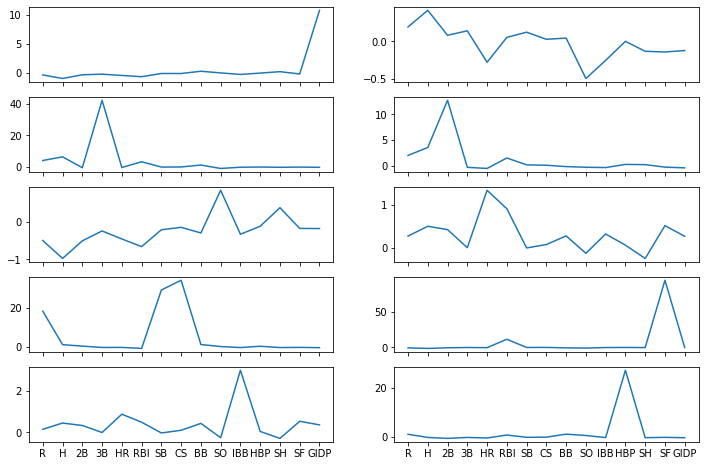

In [29]:
fig, axes = plt.subplots(5,2,sharex=True, figsize=(12,8))
n = 0
for i in range(5):
    for j in range(2):
        axes[i,j].plot(kcluster.cluster_centers_[n])
        n += 1
plt.xticks(range(len(pl_bat_per_ab.columns)), pl_bat_per_ab.columns);

## Dimensionality Reduction using T-SNE

#### Compressing our 15-dimensional batting feature space to 2 dimensions for visualization
 * an example of "manifold learning"

#### NOTE: We won't run this during the webinar since it takes a little while to complete...

In [ ]:
from sklearn.manifold import TSNE

X = pl_bat_per_ab.values
scaler = StandardScaler().fit(X)
Xsc = scaler.fit_transform(X)

def run_tsne(Xsc, index):
    X_e = TSNE(n_components=2).fit_transform(Xsc)
    dfe = pd.DataFrame(X_e, index=index)
    dfe.reset_index()
    return dfe

dfe = run_tsne(Xsc, pl_bat_per_ab.index)

dfe.reset_index(inplace=True)
dfe.rename(columns={0: 'X', 1:'Y'}, inplace=True)
dfe.head()

### Add some additional information to the tsne-embedded dataframe

In [ ]:
HOF = bbdfs['HallOfFame']
inHOF = set(HOF[HOF.inducted=='Y'].playerID)

# add HOF (Hall of Fame) column to dfe if person has been inducted in the HOF
dfe['HOF'] = dfe.playerID.apply(lambda x: x in inHOF)

# add Pitcher column to dfe if person is in pitching dataframe and has pitched in at least 10 games in their career
pl_pitch = pitching.groupby('playerID').sum()
dfe['Pitcher'] = dfe.playerID.apply(lambda x: x in pitching.playerID.values and pl_pitch.loc[x].G >= 10)

# add Name column by looking up their playerID in the people dataframe
people = bbdfs['People']
dfe['Name'] = dfe.playerID.apply(lambda x: get_player_name(x, people))

# let's have a peek
dfe.head()

## Interactive visualization using Bokeh

* Python library for plotting glyphs in figures
* Python-generated Javascript for visualization in web browser
* Can generate standalone HTML pages (as done here)
* Can be run in "server" mode with Python callbacks to change visualizations in response to user interactions

In [ ]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource, HoverTool, Legend, LegendItem

colors = dfe.Pitcher.apply(lambda x: {True:'#3333dd', False: '#dd3333'}[x])
radii = 12*dfe.HOF + 3
status = list(zip(1*dfe.HOF, 1*dfe.Pitcher))
labelmap = {(0,0): 'Player', (0,1): 'Pitcher', (1,0): 'HOF Player', (1,1): 'HOF Pitcher'}
labels = list(map(lambda x: labelmap[x], status))

R = pl_bat_per_ab['R']
H = pl_bat_per_ab['H']
TwoB = pl_bat_per_ab['2B']
ThreeB = pl_bat_per_ab['3B']
HR = pl_bat_per_ab['HR']
RBI = pl_bat_per_ab['RBI']
SO = pl_bat_per_ab['SO']
BB = pl_bat_per_ab['BB']

source = ColumnDataSource(data=dict(
    x = dfe.X,
    y = dfe.Y,
    playerID = dfe.playerID,
    name = dfe.Name,
    radii = radii,
    hof = dfe.HOF,
    pitcher = dfe.Pitcher,
    color = colors,
    label = labels,
    R = R,
    H = H,
    TwoB = TwoB,
    ThreeB = ThreeB,
    HR = HR,
    RBI = RBI,
    SO = SO,
    BB = BB
))
    
TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,save"

p = figure(tools=TOOLS, plot_width=1000, plot_height=1000)
scatter = p.scatter(source=source, x='x', y='y', size='radii', color='color', fill_alpha=0.50)
p.add_tools(HoverTool(tooltips=[('Name:', '@name'), ('HOF', '@hof'), 
                                ('R', '@R'), ('H', '@H'), ('2B', '@TwoB'), ('3B', '@ThreeB'),
                                   ('HR', '@HR'), ('SO', '@SO'), ('BB', '@BB')]))

output_file("batting_TSNE.html", title='batting')  # see also https://cvw.cac.cornell.edu/pydatasci2/images/batting_TSNE.html
show(p)

## Summary

* The Python Ecosystem provides many useful tools and packages for Data Science
* A layered ecosystem: 
    * NumPy &#8594; ( SciPy / Pandas ) &#8594; ( Scikit-learn / TensorFlow / PyTorch / Statsmodels )
    * Matplotlib &#8594; ( Pandas / Seaborn / Statsmodels / NetworkX )
* The Python Language provides support for the creation of custom pipelines not handled by default methods

For more detail, see the Cornell Virtual Workshop (CVW) tutorials:
* Python for Data Science - Part 1: Data Processing & Visualization: https://cvw.cac.cornell.edu/PyDS1
* Python for Data Science - Part 2: Data Modeling & Machine Learning: https://cvw.cac.cornell.edu/PyDS2

These slides are available as a Jupyter notebook named PyDSWebinar.ipynb in the repository at: https://github.com/CornellCAC/CVW_PyDataSci2
